In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [4]:
# Criação de um conjunto de dados desbalanceado para classificação binária.

y_binary = y.copy()
y_binary[y_binary != 1] = 0

print('Rótulo originais:\t', y[1:30])
print('Novos rótulos binários:\t', y_binary[1:30])

Rótulo originais:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Novos rótulos binários:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [5]:
np.bincount(y_binary) # Classe negativa (0) é a classe mais frequente

array([1615,  182])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=0)

from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1).fit(X_train, y_train)
score = svm.score(X_test, y_test)
print(f'Acurácia do SVM (Conjunto de Teste): {score:.3f}')

Acurácia do SVM (Conjunto de Teste): 0.996


# Classificadores fictícios

DummyClassifier é um classificador que faz predições usando regras simples, que pode ser utéis como uma referência para comparações contra classificadores atuais, especialmente em classes desbalanceadas.

In [7]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_dummy_pred = dummy_majority.predict(X_test)

y_dummy_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
score = dummy_majority.score(X_test, y_test)

print(f'Acurácia do classficador fictício (Conjunto de Teste): {score:.3f}')

Acurácia do classficador fictício (Conjunto de Teste): 0.904


# Matriz de Confusão

## Matriz de confusão Binária (Duas classes)

In [9]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_dummy_pred)

print('Classes mais frequentes (Classificador fictício)\n', confusion)

Classes mais frequentes (Classificador fictício)
 [[407   0]
 [ 43   0]]


In [10]:
# Produz predições aleatórias com algumas classes proporcionais ao conjunto de teste.

dummy_classprop = DummyClassifier(strategy='stratified').fit(X_train, y_train)
y_classprop_pred = dummy_classprop.predict(X_test)

confusion = confusion_matrix(y_test, y_classprop_pred)

print('Predição de classes proporcionais aleatórias (Classificador fictício)\n', confusion)

Predição de classes proporcionais aleatórias (Classificador fictício)
 [[367  40]
 [ 38   5]]


In [11]:
svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_pred = svm.predict(X_test)

confusion = confusion_matrix(y_test, svm_pred)

print('Classificador SVM (kernerl linear, C=1)\n', confusion)

Classificador SVM (kernerl linear, C=1)
 [[402   5]
 [  5  38]]


In [12]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression().fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

confusion = confusion_matrix(y_test, log_reg_pred)

print('Classificação utilizando regressão logística (Configurações padrão)\n', confusion)

Classificação utilizando regressão logística (Configurações padrão)
 [[401   6]
 [  8  35]]


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
tree_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, tree_pred)

print('Classificação utilizando árvores de decisão (max_depth = 2)\n', confusion)

Classificação utilizando árvores de decisão (max_depth = 2)
 [[400   7]
 [ 17  26]]


## Avaliação de métricas para classificação binária

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall)

print(f'Acurácia: {accuracy_score(y_test, tree_pred):.3f}')
print(f'Precisão: {precision_score(y_test, tree_pred):.3f}')
print(f'Revocação: {recall_score(y_test, tree_pred):.3f}')
print(f'Pontuação-f1: {f1_score(y_test, tree_pred):.3f}')

Acurácia: 0.947
Precisão: 0.788
Revocação: 0.605
Pontuação-f1: 0.684


In [15]:
# Combinação de todas as métricas anteriores

from sklearn.metrics import classification_report

print(classification_report(y_test, tree_pred, target_names=['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [16]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_pred, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_pred, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, log_reg_pred, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_pred, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.90      0.90       407
           1       0.11      0.12      0.11        43

    accuracy                           0.83       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.83      0.83      0.83       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

## Funções de decisão

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, random_state=0)

y_score_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_score_lr[0:20]))

for i in y_score_list:
    print(i)

(np.int64(0), np.float64(-29.828777962780904))
(np.int64(0), np.float64(-19.382845784187026))
(np.int64(0), np.float64(-29.1985325971362))
(np.int64(0), np.float64(-21.746312462218995))
(np.int64(0), np.float64(-22.64237161640389))
(np.int64(0), np.float64(-11.805910939353495))
(np.int64(1), np.float64(6.496005367605438))
(np.int64(0), np.float64(-23.354631016337994))
(np.int64(0), np.float64(-27.54390963560171))
(np.int64(0), np.float64(-26.888210239323946))
(np.int64(0), np.float64(-31.863036188504623))
(np.int64(0), np.float64(-22.48606908754295))
(np.int64(0), np.float64(-25.318035768543826))
(np.int64(0), np.float64(-13.384507496564876))
(np.int64(0), np.float64(-13.565652009679221))
(np.int64(0), np.float64(-13.308339195009303))
(np.int64(1), np.float64(12.180977427185114))
(np.int64(0), np.float64(-34.36241531180568))
(np.int64(0), np.float64(-13.231553863256863))
(np.int64(0), np.float64(-29.59399479472068))


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_proba_lr = log_reg.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20, 1]))

for i in y_proba_list:
    print(i)

(np.int64(0), np.float64(1.1105198579044905e-13))
(np.int64(0), np.float64(3.820648027503074e-09))
(np.int64(0), np.float64(2.0856355142099873e-13))
(np.int64(0), np.float64(3.5949801419541346e-10))
(np.int64(0), np.float64(1.4673811969919787e-10))
(np.int64(0), np.float64(7.4602741159710544e-06))
(np.int64(1), np.float64(0.9984928181349275))
(np.int64(0), np.float64(7.198012933865252e-11))
(np.int64(0), np.float64(1.0910183000144974e-12))
(np.int64(0), np.float64(2.101835218377733e-12))
(np.int64(0), np.float64(1.4523095950588434e-14))
(np.int64(0), np.float64(1.7156325427793654e-10))
(np.int64(0), np.float64(1.0104545250057574e-11))
(np.int64(0), np.float64(1.538797892929248e-06))
(np.int64(0), np.float64(1.2838421536828856e-06))
(np.int64(0), np.float64(1.660584588911754e-06))
(np.int64(1), np.float64(0.9999948729625167))
(np.int64(0), np.float64(1.1928687056324115e-15))
(np.int64(0), np.float64(1.7931160233451626e-06))
(np.int64(0), np.float64(1.4044017539416977e-13))


c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Curvas de precisão-revocação

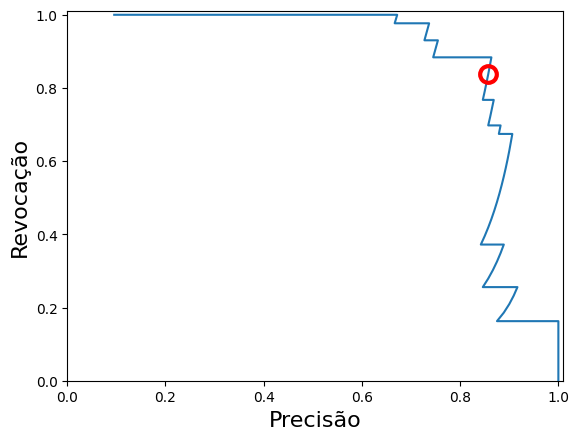

In [19]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_score_lr)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Curva Precisão-Revocação')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precisão', fontsize=16)
plt.ylabel('Revocação', fontsize=16)
# plt.axes().set_aspect('equal')
plt.show()

#

# Curva ROC, Área abaixo da curva (AUC)

c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


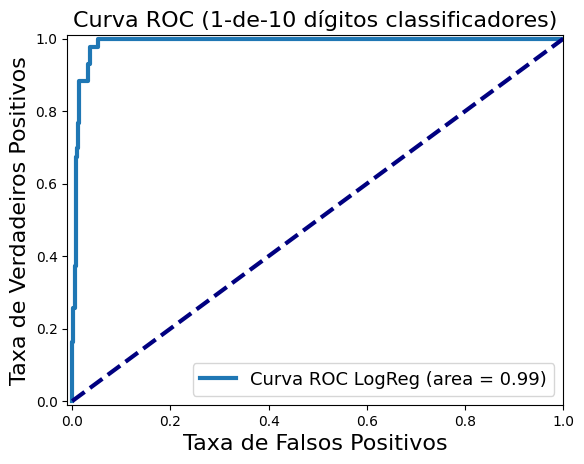

In [20]:
from sklearn.metrics import roc_curve, auc

y_score_lr = log_reg.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label=f'Curva ROC LogReg (area = {roc_auc_lr:.2f})')
plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=16)
plt.title('Curva ROC (1-de-10 dígitos classificadores)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

Gama = 0.01	 Acurácia = 0.91	 AUC = 1.00
Gama = 0.10	 Acurácia = 0.90	 AUC = 0.98
Gama = 0.20	 Acurácia = 0.90	 AUC = 0.66
Gama = 1.00	 Acurácia = 0.90	 AUC = 0.50


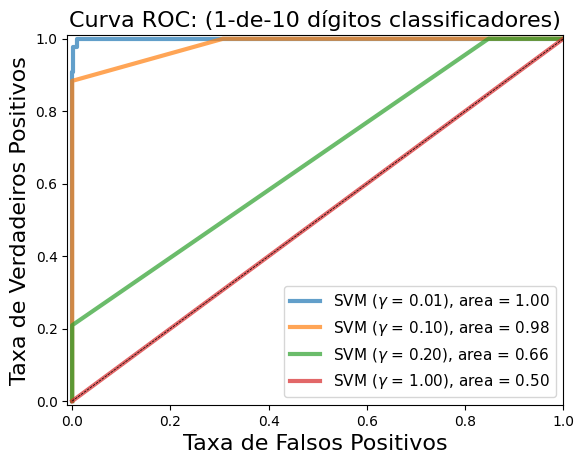

In [21]:
from matplotlib import cm

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])

for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)

    print(f'Gama = {g:.2f}\t Acurácia = {accuracy_svm:.2f}\t AUC = {roc_auc_svm:.2f}')

    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, label=f'SVM ($\gamma$ = {g:.2f}), area = {roc_auc_svm:.2f}')

plt.xlabel('Taxa de Falsos Positivos', fontsize=16)
plt.ylabel('Taxa de Verdadeiros Positivos', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc='lower right', fontsize=11)
plt.title('Curva ROC: (1-de-10 dígitos classificadores)', fontsize=16)
plt.show()

## Medida de avaliação para classificação Multi-Classe

### Matriz de confusão Multi-Classe

Text(0.5, 14.722222222222216, 'Rótulo Predito')

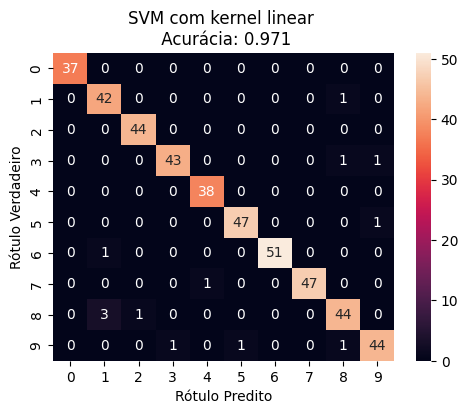

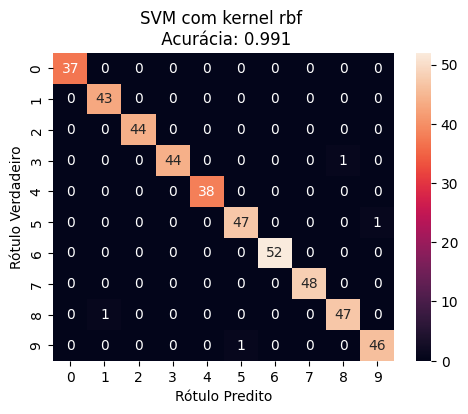

In [22]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)

svm = SVC(kernel='linear').fit(X_train_mc, y_train_mc)
svm_pred_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_pred_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0, 10)], columns = [i for i in range(0, 10)])

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_cm, annot=True)
plt.title(f'SVM com kernel linear \n Acurácia: {accuracy_score(y_test_mc, svm_pred_mc):.3f}')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')

svm = SVC(kernel='rbf').fit(X_train_mc, y_train_mc)
svm_pred_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_pred_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0, 10)], columns = [i for i in range(0, 10)])

plt.figure(figsize=(5.5, 4))
sns.heatmap(df_cm, annot=True)
plt.title(f'SVM com kernel rbf \n Acurácia: {accuracy_score(y_test_mc, svm_pred_mc):.3f}')
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Predito')

In [23]:
print(classification_report(y_test_mc, svm_pred_mc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



## Média das métricas Micro vs Macro

Se as classes tiverem aproximadamente o mesmo número de instâncias, as médias macro e micro serão praticamente as mesmas.
Se algumas classes forem muito maiores (com mais instâncias) do que outros, e você quiser:
<ul>
<li> Ponderar sua métrica em favor das maiores classes, use a média micro (micro-averaging).
<li> Ponderar sua métrica em favor das menores classes, use a média macro (macro-averaging).
</ul>
Se a média micro for muito menor que a média macro, então examine as classes maiores em busca de um baixo desempenho da métrica.

Se a média macro for muito menor que a média micro, então examine as classes menores em busca de um baixo desempenho da métrica.

In [24]:
micro_mean_precision = precision_score(y_test_mc, svm_pred_mc, average = 'micro')
macro_mean_precision = precision_score(y_test_mc, svm_pred_mc, average = 'macro')

print(f'Precisão média micro: {micro_mean_precision:.2f} (Instância iguais)')
print(f'Precisão média macro: {macro_mean_precision:.2f} (Classes iguais)')

Precisão média micro: 0.99 (Instância iguais)
Precisão média macro: 0.99 (Classes iguais)


In [25]:
micro_mean_f1 = f1_score(y_test_mc, svm_pred_mc, average = 'micro')
macro_mean_f1 = f1_score(y_test_mc, svm_pred_mc, average = 'macro')

print(f'Pontuação f1 média micro: {micro_mean_f1:.2f} (Instância iguais)')
print(f'Pontuação f1 média macro: {macro_mean_f1:.2f} (Classes iguais)')

Pontuação f1 média micro: 0.99 (Instância iguais)
Pontuação f1 média macro: 0.99 (Classes iguais)
